In [133]:
# First I need to categorize the data from my participants
# Trials (1-667 (might have to cut some out)), stimuli_type (Happy vs Angry), response (Approach vs Avoid),% #Congruency (congruent vs incongruent), block_type (stable vs volatile), change objectively correct to accuracy maybe and structure it as (correct vs incorrect), response_time in ms, and reward amount ( -10 or +10 cents)
# mix objectively correct and stimuli type for the Congruency condition  

#My 1st step is to create a data frame where all the participants data is stored

#Import everything 

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import glob2
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



pd.set_option('display.max_rows', None)

# Now we load the data

In [135]:

data = pd.read_csv(
    '/Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv',
    delimiter=';')

print(data)


     trial  emotional_cue_time response objectively_correct  \
0        0        1.741364e+09       up                Even   
1        1        1.741364e+09     down                Even   
2        2        1.741364e+09      NaN                Late   
3        3        1.741364e+09       up                Even   
4        4        1.741364e+09     down                Even   
5        5        1.741364e+09     down                Even   
6        6        1.741364e+09     down                Even   
7        7        1.741364e+09       up                Even   
8        8        1.741364e+09     down                True   
9        9        1.741364e+09     down                True   
10      10        1.741364e+09       up                True   
11      11        1.741364e+09       up                True   
12      12        1.741364e+09     down                True   
13      13        1.741364e+09       up                True   
14      14        1.741364e+09       up                

# Now I wish to automatize my data frame = concatenate

In [136]:
# Define the base folder and selected subjects
base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

all_data = []

# Loop through each subject folder and process `ses-mri01` for now
for subject in selected_subjects:
    # Only focus on `ses-mri01` for now
    session = "ses-mri01"
    beh_folder = os.path.join(base_folder, subject, session, "beh")

    # Ensure the directory exists
    if not os.path.isdir(beh_folder):
        print(f"❌ Directory does not exist: {beh_folder}")
        continue

    # List all CSV files in the folder, but only process 'behavioural_output' files
    csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

    # If no relevant files are found, skip this subject
    if not csv_files:
        print(f"⚠️ No relevant behavioural CSV files found for {subject} in {session}")
        continue

    # Loop through the relevant CSV files
    for file in csv_files:
        print(f"📂 Reading {file}...")

        try:
            # Read the file with the correct delimiter
            df = pd.read_csv(file, delimiter=';', encoding='utf-8')

            # Check the first few rows to ensure the data is correct
            print(f"📊 Data from {file}:")
            print(df.head())  # Print first few rows to ensure data is being read correctly

            # Drop unwanted columns
            cols_to_drop = ["datapoint", "location_y", "timepoints", "timepoint"]
            df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

            # Remove empty columns
            df = df.dropna(how="all", axis=1)

            # Add subject ID and session columns
            df["subject"] = subject
            df["session"] = session  # Add the session column here

            # Print the cleaned data to verify
            print(f"After cleaning data from {file}:")
            print(df.head())  # Check if data is non-empty

            all_data.append(df)

        except Exception as e:
            print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Check if combined_df is empty before saving
    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Combined data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")



📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📊 Data from /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv:
   trial  emotional_cue_time response objectively_correct  \
0      0        1.741364e+09       up                Even   
1      1        1.741364e+09     down                Even   
2      2        1.741364e+09      NaN                Late   
3      3        1.741364e+09       up                Even   
4      4        1.741364e+09     down                Even   

  subjectively_correct  response_time   RT_s  feedback_time  stimuli_type  \
0                False   1.741364e+09  1.091   1.741364e+09             1   
1                False   1.741364e+09  0.597   1.741364e+09             1   
2                 Late   1.741364e+09  1.213   1.741364e+09             1   
3                False   1.741364e+09  1.094   1.741364

# Now I need to categorize my data: 


In [137]:
#I have also started to think on how to categorize the data and then what to do with it. I was thinking on something like trials (1-667 (might have to cut some out)), stimuli_type (Happy vs Angry), response (Approach vs Avoid), Congruency (congruent vs incongruent), block_type (stable vs volatile), change objectively correct to accuracy maybe and structure it as (correct vs incorrect), response_time in ms, and reward amount ( -10 or +10 cents)
#Mix objectively correct and stimuli type to create congruency 
#After talking with kenneth changes must be made here 
#There is a very small block right after the two stable blocks that should be considered stable instead of volatile as participants have no idea what’s going on there-> only very first time they experience a volatile block not for the rest of the volatile periods 
# Same happens after 6-8-10 trials when they restart a stable block-> label it as volatile 
# Look into 80-20 and fix up that column; you have to filter out 50 (corresponds to 9 first trials) as that is only the very beginning of the trials-80/20 determine reward and how participant should act (joystick action)

#I should organise my data by subject_id, trial, stimuli_type and probability conditions then I could add switch and volatility
# stimuli_type and probability_condition are intertiwned to calculate switch; we are looking at within comparisons of categories so we need to take both into account, this is also why the order is relevant

In [144]:
base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014","sub-015", "sub-016", "sub-020","sub-022"]

all_data = []

for subject in selected_subjects:
    subject_folder = os.path.join(base_folder, subject)
    session_dirs = sorted([d for d in os.listdir(subject_folder) if d.startswith("ses-")])

    for session in session_dirs:
        beh_folder = os.path.join(subject_folder, session, "beh")

        if not os.path.isdir(beh_folder):
            print(f"❌ Directory does not exist: {beh_folder}")
            continue

        csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

        if not csv_files:
            print(f"⚠️ No behavioural CSV files found for {subject} in {session}")
            continue

        for file in csv_files:
            print(f"📂 Reading {file}...")
            try:
                df = pd.read_csv(file, delimiter=";", encoding="utf-8")
                #drop unwanted columns
                cols_to_drop = ["emotional_cue_time", "subjectively_correct", "feedback_time", "face_type", "response_time", "stimuli_name", "congruency"]
                df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")
  
            # Remove empty columns
                df = df.dropna(how="all", axis=1)

                # Add subject ID and session columns
                df["subject"] = subject
                df["session"] = session
    
                df = df.sort_values(['subject', 'session', 'stimuli_type', 'trial'])
    
                # --- CATEGORIZE DATA --- #
    
                # Ensure trial column exists before filtering
                if "trial" in df.columns:
                    df = df[df["trial"].between(1, 667)]
    
                # Categorize stimuli type
                df["stimuli_type"] = df["stimuli_type"].map({1: "Angry", 2: "Happy"})
    
                # Remove rows with probability_condition == 50
                df = df[df["probability_condition"] != 50]
    
                # Categorize response as Approach vs. Avoid (fixed mapping)
                df["response"] = df["response"].map({"up": "Avoid", "down": "Approach"})
    
                # Ensure reward amount is numeric
                df["reward_amount"] = pd.to_numeric(df["reward_amount"], errors="coerce")
    
                # Calculate change in reward amount per trial
                df["reward_change"] = df["reward_amount"].diff().round(2)  # Round to 2 decimal places
                df["reward_display"] = df["reward_change"].map({0.10: "+10 cents", -0.10: "-10 cents"}).fillna("unknown")
    
                # Define congruency based on stimuli type and response
                df["congruency_response"] = "incongruent"  # Default
                df.loc[
                    (df["stimuli_type"] == "Happy") & (df["response"] == "Approach"), "congruency_response"] = "congruent"
                df.loc[(df["stimuli_type"] == "Angry") & (df["response"] == "Avoid"), "congruency_response"] = "congruent"
    
                # WE WANT To see congruency_condition where we look at the underlying probability condition; the condition that gives the highest chance of giving a reward 
                df['task_congruency'] = np.where(df['response'] ==
                                                 df['objectively_correct'], 'congruent', 'incongruent')
    
               # Step 1: Identify switches only within the same stimuli type (avoid Angry↔Happy counting as switches)
                df['switch'] = df.groupby(['subject', 'session', 'stimuli_type'])['probability_condition'].transform(lambda x: x != x.shift(1)).astype(int)
                
                # Set the first trial in each subject/session/stimuli_type to not be a switch
                first_idx = df.groupby(['subject', 'session', 'stimuli_type']).head(1).index
                df.loc[first_idx, 'switch'] = 0
                
                # Step 2: Assign cumulative switch groups within each subject/session/stimuli_type
                df['switch_group'] = df.groupby(['subject', 'session', 'stimuli_type'])['switch'].cumsum()
                
                # Step 3: Time since switch
                df['time_since_switch'] = df.groupby(['subject', 'session', 'stimuli_type', 'switch_group']).cumcount()
                
                # Step 4: Block size
                df['block_size'] = df.groupby(['subject', 'session', 'stimuli_type', 'switch_group'])['trial'].transform('count')
                
                # Step 5: Volatility logic
                true_block_types = (['stable'] * 2 + ['volatile'] * 6) * 3  # up to 24 blocks
                
                def assign_volatility(sub_df):
                    unique_groups = sub_df['switch_group'].unique()
                    block_map = dict(zip(sorted(unique_groups), true_block_types[:len(unique_groups)]))
                    perceived = []
                    for i, row in sub_df.iterrows():
                        group = row['switch_group']
                        tss = row['time_since_switch']
                        if group == unique_groups[0]:
                            p_vol = 'volatile' if tss < 10 else block_map[group]
                        else:
                            prev_group = unique_groups[list(unique_groups).index(group) - 1]
                            prev_vol = block_map[prev_group]
                            p_vol = prev_vol if tss < 10 else block_map[group]
                        perceived.append(p_vol)
                    return pd.Series(perceived, index=sub_df.index)
                
                df['volatility'] = (df.groupby(['subject', 'session', 'stimuli_type'], group_keys=False, observed=True).apply(assign_volatility, include_groups=False)
                                    )
    
                all_data.append(df)

            except Exception as e:
                print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        # Reorder and sort
        preferred_order = ["subject", "session", "stimuli_type", "trial", "probability_condition", "switch",
                           "time_since_switch", "volatility"]
        other_columns = [col for col in combined_df.columns if col not in preferred_order]
        combined_df = combined_df[preferred_order + other_columns]

        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Categorized data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")

📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri02/beh/behavioural_output_sub-005_session-02_skyra_2025-03-14_11-00-23.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri03/beh/behavioural_output_sub-005_session-03_skyra_2025-03-21_15-48-02.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri04/beh/behavioural_output_sub-005_session-04_skyra_2025-03-28_15-50-17.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri01/beh/behavioural_output_sub-010_session-01_dummy_2025-03-11_11-18-41.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri02/beh/behavioural_output_sub-010_session-02_skyra_2025-03-13_11-21-05.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri03/beh/behavioural_output_sub-010_session-03_skyra_2025-03-19_11-41-24.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-m

# Rain plot cloud 

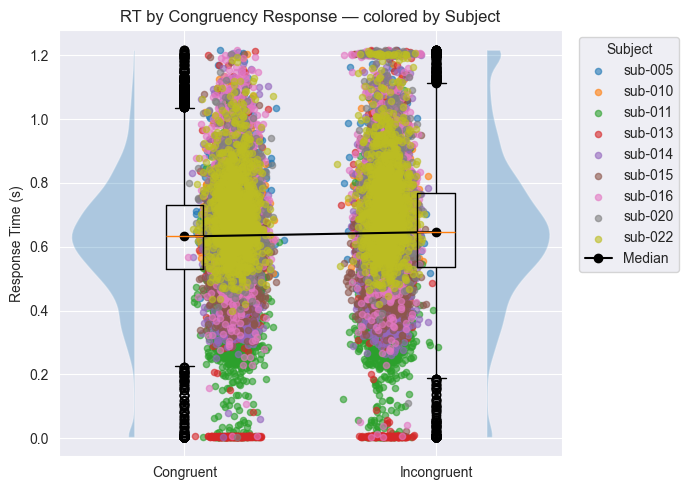

In [162]:
conds    = ['congruent', 'incongruent']
subjects = sorted(final_df['subject'].unique())
cmap     = plt.get_cmap('tab10')
colors   = {subj: cmap(i % 10) for i, subj in enumerate(subjects)}

fig, ax = plt.subplots(figsize=(7, 5))

# 1) draw half-violins at x = 0.8 and x = 2.2
all_data = [df[df['congruency_response']==cond]['RT_s'].values for cond in conds]
parts    = ax.violinplot(all_data, positions=[0.8, 2.2], showextrema=False)
for body, pos in zip(parts['bodies'], [0.8, 2.2]):
    verts = body.get_paths()[0].vertices
    if pos <= 1:
        verts[:, 0] = np.clip(verts[:, 0], -np.inf, pos)
    else:
        verts[:, 0] = np.clip(verts[:, 0], pos, np.inf)

# 2) overlay per-subject jittered points at x = 1.2 and 1.8
jitter_centers = [1.2, 1.8]
for subj in subjects:
    for ci, cond in enumerate(conds):
        vals = df[
            (df['subject'] == subj) &
            (df['congruency_response'] == cond)
        ]['RT_s'].values
        center = jitter_centers[ci]
        jitter = np.random.normal(loc=center, scale=0.05, size=len(vals))
        ax.scatter(jitter, vals,
                   color=colors[subj], alpha=0.6, s=20,
                   label=subj if ci == 0 else "")

# 3) median line at x = 1 and 2
medians = [np.median(d) for d in all_data]
ax.plot([1, 2], medians, marker='o', linestyle='-', color='k', label='Median')

# 4) boxplot (default positions at x = 1 and 2)
ax.boxplot(all_data)

# 5) labels, legend, title
ax.set_xticks([1, 2])
ax.set_xticklabels([c.capitalize() for c in conds])
ax.set_ylabel('Response Time (s)')
ax.set_title('RT by Congruency Response — colored by Subject')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Subject')

plt.tight_layout()
plt.show()


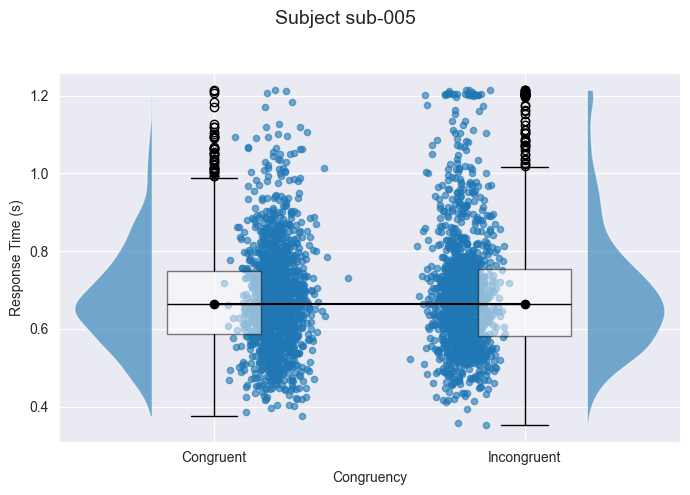

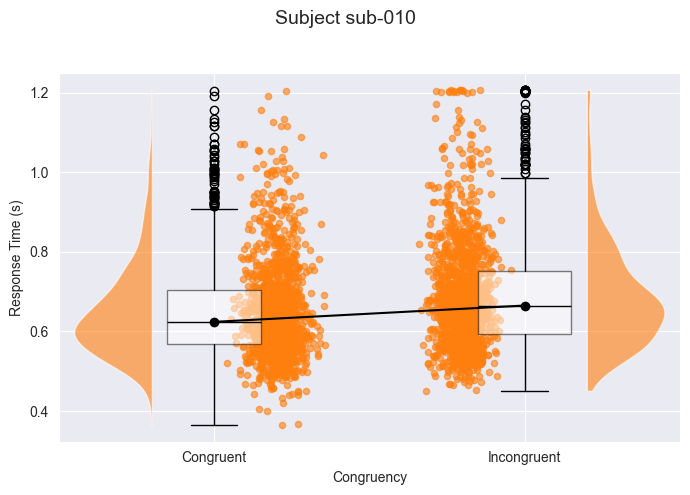

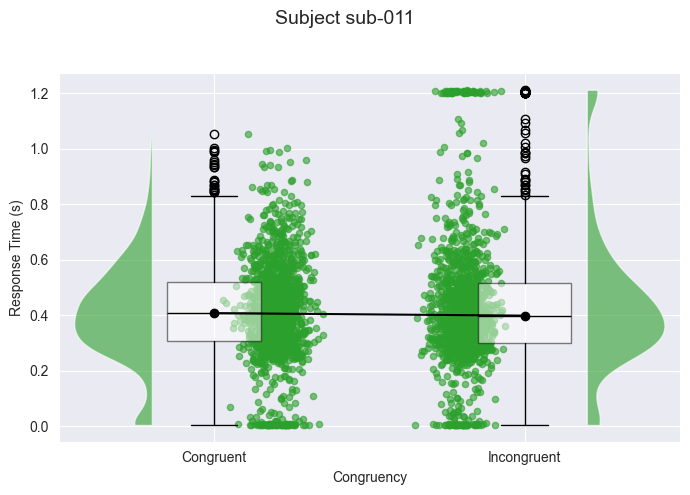

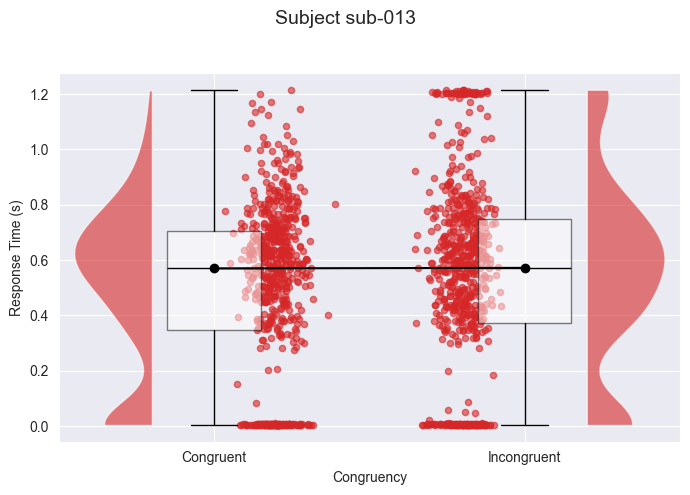

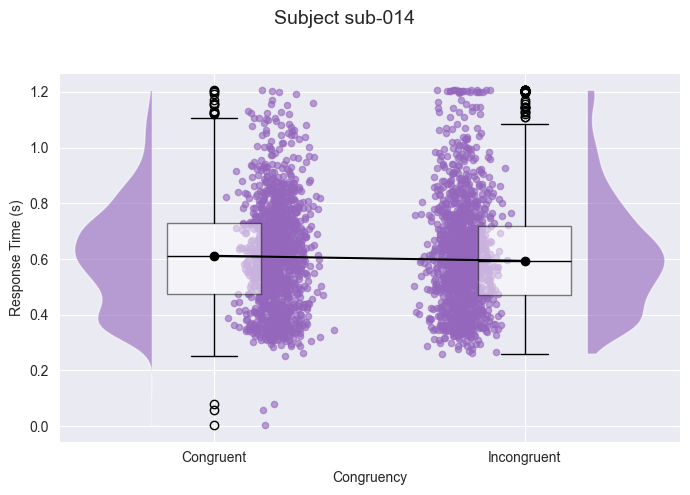

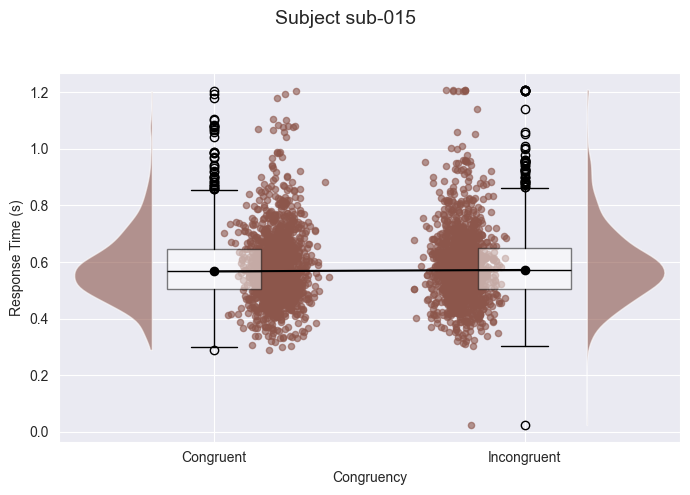

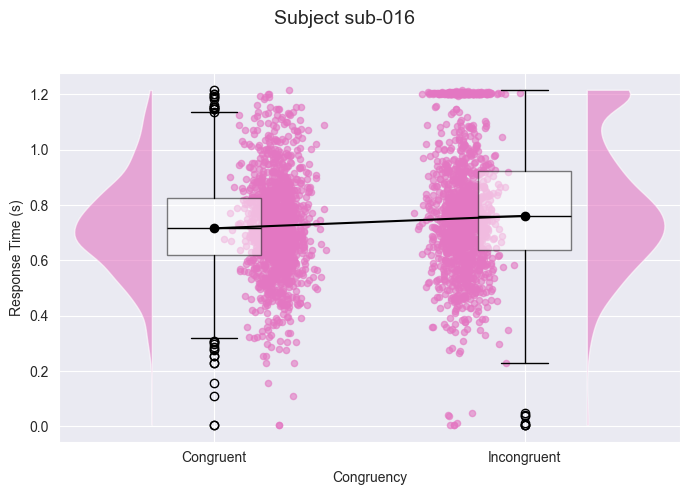

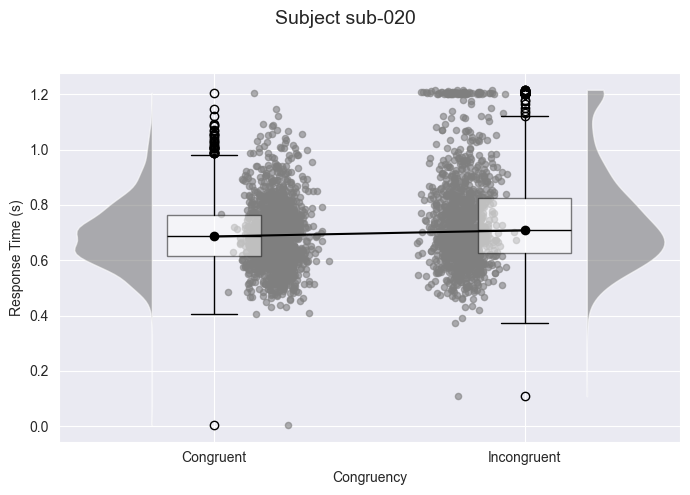

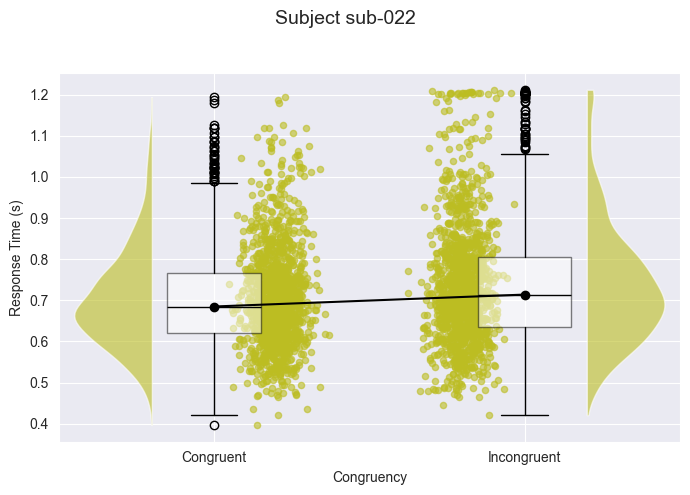

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Load your data
final_df = pd.read_csv(
    "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv",
    sep=";"
)
df = final_df.copy()

# 1) Plot settings
conds           = ['congruent', 'incongruent']
subjects        = sorted(df['subject'].unique())
cmap            = plt.get_cmap('tab10')
colors          = {subj: cmap(i % 10) for i, subj in enumerate(subjects)}
jitter_centers  = [1.2, 1.8]   # x‐positions for the rain

# 2) One figure per subject
for subj in subjects:
    df_sub = df[df['subject'] == subj]
    if df_sub.empty:
        continue

    fig, ax = plt.subplots(figsize=(7, 5))
    fig.suptitle(f"Subject {subj}", fontsize=14)

    # 3) Half-violins at x = 0.8 & 2.2
    all_data = [
        df_sub[df_sub['congruency_response'] == cond]['RT_s'].values
        for cond in conds
    ]
    parts = ax.violinplot(all_data, positions=[0.8, 2.2], showextrema=False)
    for body, pos in zip(parts['bodies'], [0.8, 2.2]):
        verts = body.get_paths()[0].vertices
        if pos <= 1:
            verts[:, 0] = np.clip(verts[:, 0], -np.inf, pos)
        else:
            verts[:, 0] = np.clip(verts[:, 0], pos, np.inf)
        body.set_facecolor(colors[subj])
        body.set_alpha(0.6)

    # 4) Boxplot at x = 1 & 2
    ax.boxplot(all_data, positions=[1, 2], widths=0.3,
               patch_artist=True,
               boxprops=dict(facecolor='white', edgecolor='k', alpha=0.5),
               medianprops=dict(color='k'))

    # 5) Jittered points at x = 1.2 & 1.8
    for ci, cond in enumerate(conds):
        vals   = df_sub[df_sub['congruency_response'] == cond]['RT_s'].values
        jitter = np.random.normal(loc=jitter_centers[ci], scale=0.05, size=len(vals))
        ax.scatter(jitter, vals,
                   color=colors[subj], alpha=0.6, s=20)

    # 6) Median connector between x = 1 & 2
    medians = [np.median(data) for data in all_data]
    ax.plot([1, 2], medians, marker='o', linestyle='-', color='k')

    # 7) Final formatting
    ax.set_xticks([1, 2])
    ax.set_xticklabels([c.capitalize() for c in conds])
    ax.set_ylabel('Response Time (s)')
    ax.set_xlabel('Congruency')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


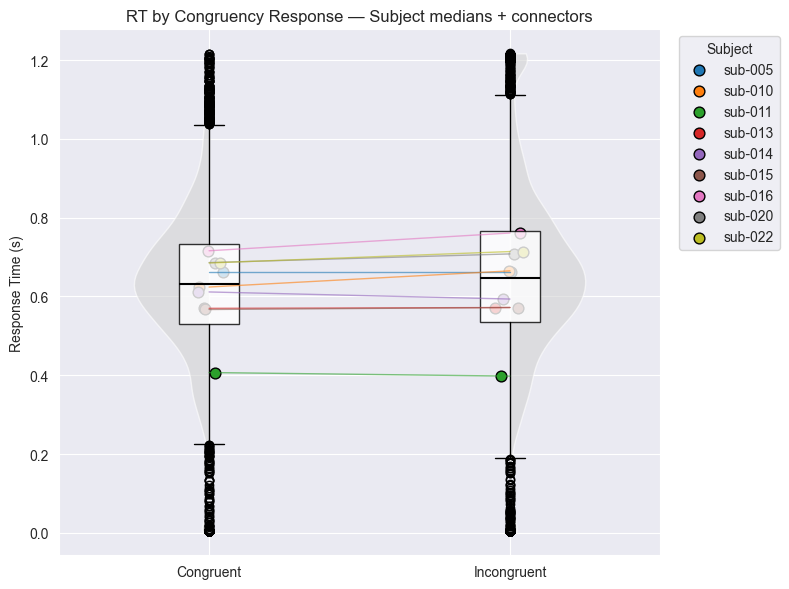

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Load your data
# Adjust the path to wherever your CSV lives
df = pd.read_csv(
    "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv",
    sep=";"
)

# 1) Settings
conds      = ['congruent', 'incongruent']
positions  = [1, 2]                            # x-positions for the two conditions
subjects   = sorted(df['subject'].unique())   # list of all subjects
cmap       = plt.get_cmap('tab10')
colors     = {subj: cmap(i % 10) for i, subj in enumerate(subjects)}

# 2) Start the figure
fig, ax = plt.subplots(figsize=(8, 6))

# 3) Half-violins (clipped) of the full RT distributions
all_data = [df[df['congruency_response'] == c]['RT_s'].values for c in conds]
parts = ax.violinplot(all_data, positions=positions, showextrema=False)
for body, pos in zip(parts['bodies'], positions):
    verts = body.get_paths()[0].vertices
    if pos == 1:
        # left half of the violin
        verts[:, 0] = np.clip(verts[:, 0], -np.inf, pos)
    else:
        # right half of the violin
        verts[:, 0] = np.clip(verts[:, 0], pos, np.inf)
    body.set_facecolor('lightgray')
    body.set_alpha(0.6)

# 4) Semi-transparent boxplots at the same positions
ax.boxplot(
    all_data,
    positions=positions,
    widths=0.2,
    patch_artist=True,
    boxprops=dict(facecolor='white', edgecolor='k', alpha=0.8),
    medianprops=dict(color='black', linewidth=1.5),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black')
)

# 5) Compute each subject’s median RT per condition
med_rt = (
    df
    .groupby(['subject', 'congruency_response'])['RT_s']
    .median()
    .unstack()
)

# 6) Draw connecting lines (one per subject)
for subj in subjects:
    y1 = med_rt.loc[subj, 'congruent']
    y2 = med_rt.loc[subj, 'incongruent']
    ax.plot(
        positions,
        [y1, y2],
        color=colors[subj],
        alpha=0.6,
        linewidth=1
    )

# 7) Overlay one jittered dot per subject (colored) at each position
for subj in subjects:
    for i, pos in enumerate(positions):
        cond = conds[i]
        y = med_rt.loc[subj, cond]
        x = pos + np.random.uniform(-0.05, 0.05)
        ax.scatter(
            x, y,
            color=colors[subj],
            s=60,
            edgecolor='k',
            label=subj if i == 0 else ""
        )

# 8) Final formatting
ax.set_xticks(positions)
ax.set_xticklabels([c.capitalize() for c in conds])
ax.set_ylabel('Response Time (s)')
ax.set_title('RT by Congruency Response — Subject medians + connectors')
ax.legend(title='Subject', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


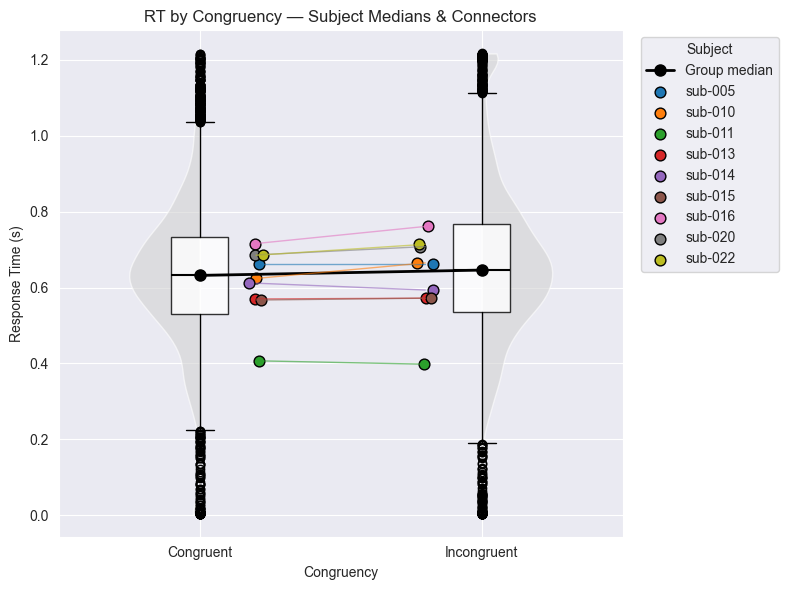

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Load your data
df = pd.read_csv(
    "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv",
    sep=";"
)

# 1) Plot settings
conds           = ['congruent', 'incongruent']
positions       = [1, 2]               # x-positions for violins & group median
jitter_centers  = [1.2, 1.8]           # x-positions for subject points & connectors
subjects        = sorted(df['subject'].unique())
cmap            = plt.get_cmap('tab10')
colors          = {subj: cmap(i % 10) for i, subj in enumerate(subjects)}

# 2) Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# 3) Half-violins of the full RT distributions
all_data = [df[df['congruency_response'] == c]['RT_s'].values for c in conds]
parts = ax.violinplot(all_data, positions=positions, showextrema=False)
for body, pos in zip(parts['bodies'], positions):
    verts = body.get_paths()[0].vertices
    if pos == 1:
        verts[:, 0] = np.clip(verts[:, 0], -np.inf, pos)  # left half
    else:
        verts[:, 0] = np.clip(verts[:, 0], pos, np.inf)   # right half
    body.set_facecolor('lightgray')
    body.set_alpha(0.6)

# 4) Semi-transparent boxplots at x = 1 & 2
ax.boxplot(
    all_data,
    positions=positions,
    widths=0.2,
    patch_artist=True,
    boxprops=dict(facecolor='white', edgecolor='k', alpha=0.8),
    medianprops=dict(color='black', linewidth=1.5),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markeredgecolor='black')
)

# 5) Group median line + points
group_medians = [np.median(d) for d in all_data]
ax.plot(
    positions, group_medians,
    marker='o', color='black',
    linestyle='-', linewidth=2, markersize=8,
    label='Group median'
)

# 6) Compute per-subject median RT per condition
med_rt = (
    df
    .groupby(['subject', 'congruency_response'])['RT_s']
    .median()
    .unstack()
)

# 7) Per-subject connectors & points at jitter_centers
for subj in subjects:
    y1 = med_rt.loc[subj, 'congruent']
    y2 = med_rt.loc[subj, 'incongruent']

    # 7a) connector line
    ax.plot(
        jitter_centers, [y1, y2],
        color=colors[subj], alpha=0.6, linewidth=1
    )

    # 7b) jittered points (label each subject once)
    x1 = jitter_centers[0] + np.random.uniform(-0.03, 0.03)
    x2 = jitter_centers[1] + np.random.uniform(-0.03, 0.03)
    ax.scatter(x1, y1,
               color=colors[subj], s=60, edgecolor='k', label=subj)
    ax.scatter(x2, y2,
               color=colors[subj], s=60, edgecolor='k')

# 8) Final formatting
ax.set_xticks(positions)
ax.set_xticklabels([c.capitalize() for c in conds])
ax.set_ylabel('Response Time (s)')
ax.set_xlabel('Congruency')
ax.set_title('RT by Congruency — Subject Medians & Connectors')
ax.legend(title='Subject', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


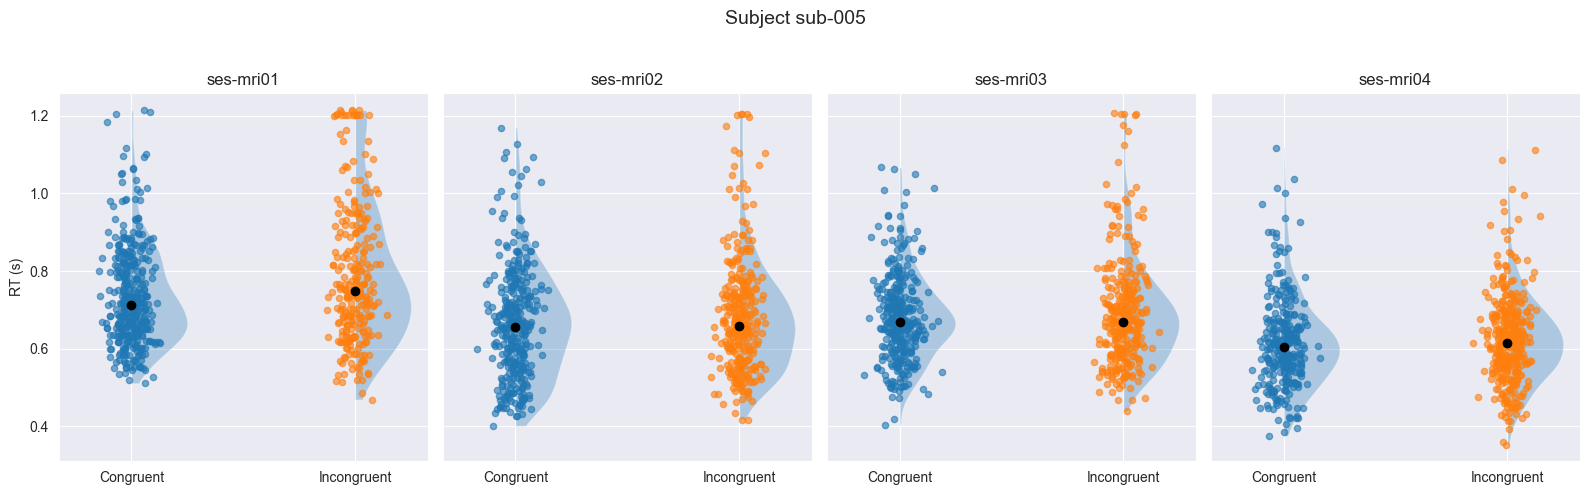

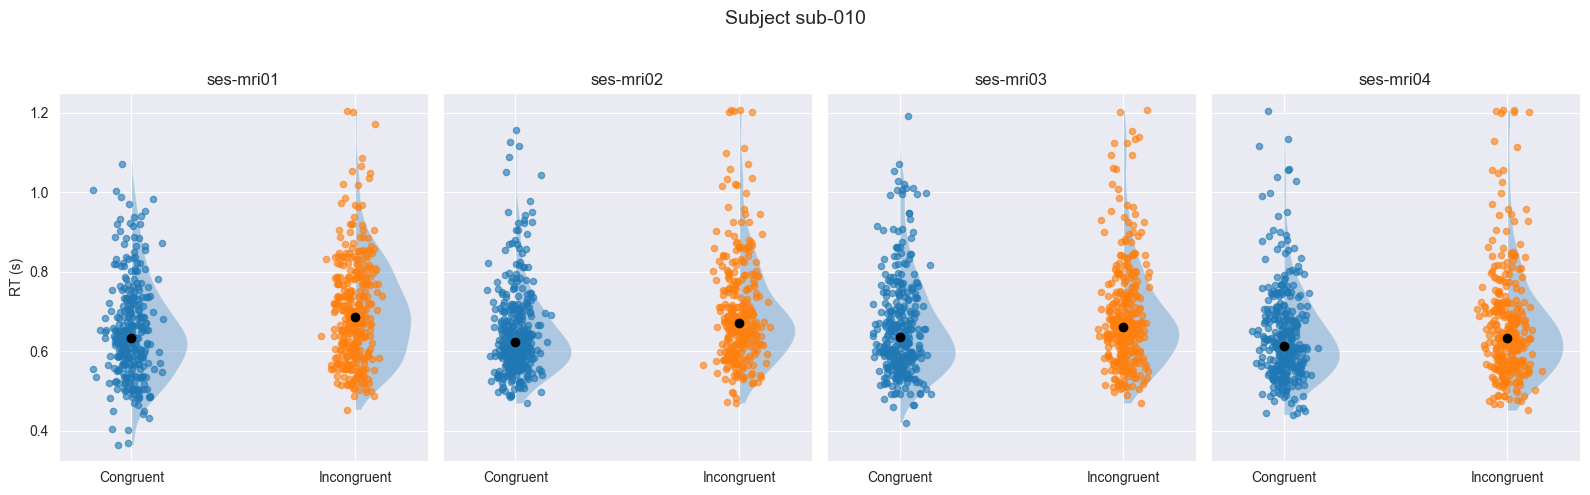

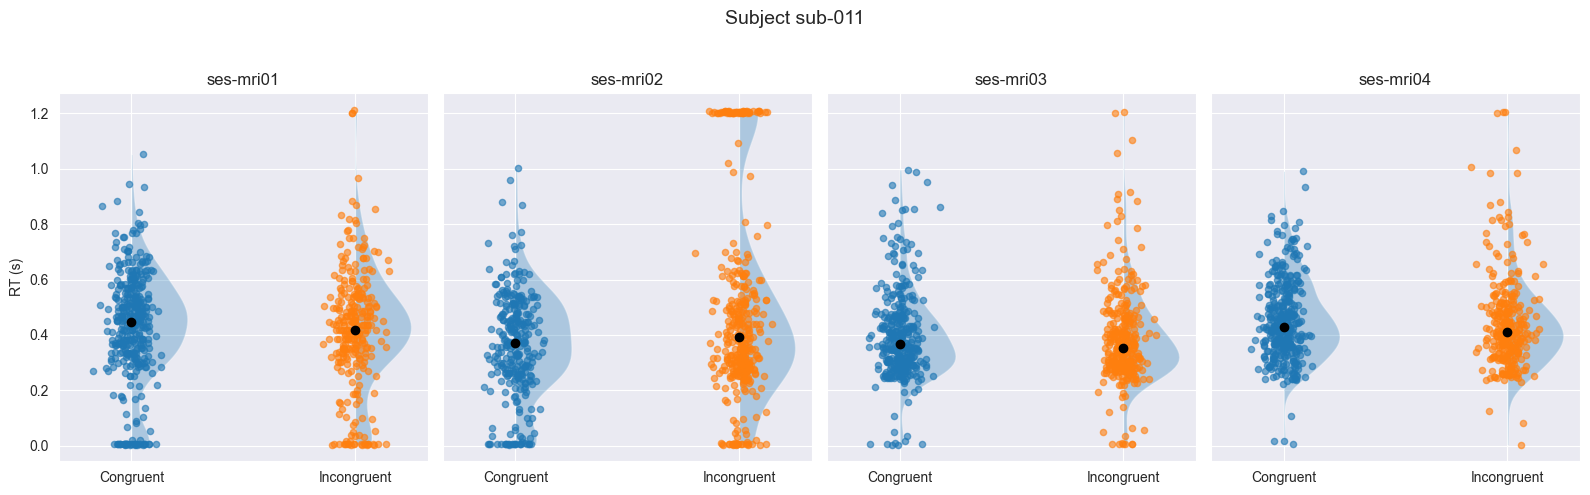

ValueError: zero-size array to reduction operation minimum which has no identity

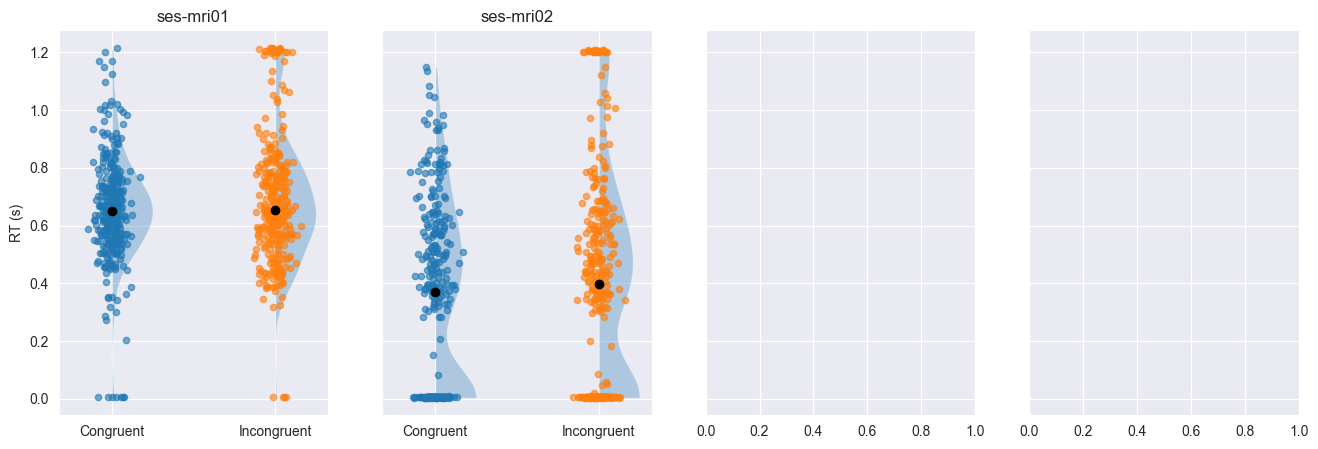

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# — assumes `df` has columns ['subject','session','congruency_response','RT_s']
subjects = sorted(df['subject'].unique())
sessions = sorted(df['session'].unique())  # your 4 session names
conds    = ['congruent', 'incongruent']

for subj in subjects:
    # make a 1×N grid, always returned as a 2D array thanks to squeeze=False
    fig, axes = plt.subplots(
        1, len(sessions),
        figsize=(4 * len(sessions), 5),
        sharey=True,
        squeeze=False
    )

    for j, ses in enumerate(sessions):
        ax = axes[0, j]             # note the [0, j] indexing
        # gather RTs for this subject/session by congruency
        data = [
            df[(df['subject']==subj) &
               (df['session']==ses) &
               (df['congruency_response']==cond)]['RT_s'].values
            for cond in conds
        ]

        # half-violins
        parts = ax.violinplot(data, positions=[1,2], showextrema=False)
        for body, pos in zip(parts['bodies'], [1,2]):
            verts = body.get_paths()[0].vertices
            verts[:, 0] = np.clip(verts[:, 0], pos, None)

        # jittered points + medians
        for pos, vals in zip([1,2], data):
            if len(vals):
                jitter = np.random.normal(loc=pos, scale=0.05, size=len(vals))
                ax.scatter(jitter, vals, alpha=0.6, s=20)
                ax.plot(pos, np.median(vals), 'ko')

        ax.set_title(ses)
        ax.set_xticks([1,2])
        ax.set_xticklabels([c.capitalize() for c in conds])
        if j == 0:
            ax.set_ylabel('RT (s)')

    fig.suptitle(f'Subject {subj}', fontsize=14)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
    
print(df[['RT_s']])
